# Handwritten digits Classification usign CNN,KNN and SVM

MNIST:
1. Introduction
2. Data preparation
   * Load data
   * Normalization
   * Reshape
   * Label encoding
3. Convolution Neural Network
   * Define the model
   * Data augmentation
   * Model training
4. Evaluate the model
   * Training and validation curves
   * Confusion matrix
5. KNN (k-nearest neighbors)
6. SVM (support vector machine)
7. Model Comparison Report
8. Report on Challenge faced

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Introduction

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms.

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves.

Our goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

### Import all Necessary Libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from keras.layers import Conv2D, Lambda, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers
from tensorflow.keras.layers import BatchNormalization

from keras.preprocessing.image import ImageDataGenerator

from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

### Data preparation
Load data

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train[0].shape   #28 pixel image (28width, 28 height)

(28, 28)

In [ ]:
x_train  #3D numpy array , 60,000 2D array

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
x_train[0] #there is a pixels values b/w 0(black) and 255(white)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0]  #labels

5

In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

5


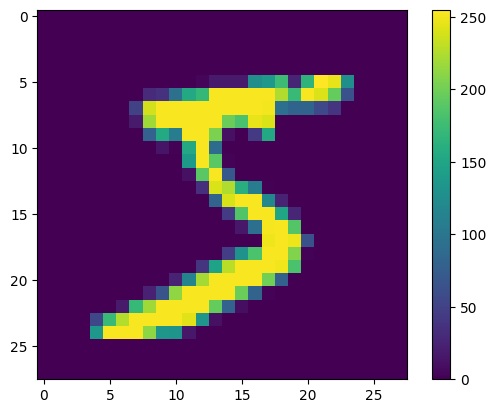

In [ ]:
plt.figure()
plt.imshow(x_train[0])  #every image shape is 28 /28
print(y_train[0])    #to see label of particular image
plt.colorbar()
plt.show()

###Normalization:
We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0 to 1] data than on [0 to 255].

In [ ]:
x_train = x_train /255
x_test = x_test /255

In [ ]:
#now check every values are in b/w 0 to 1
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

Reshape

In [ ]:
# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
# canal = 1 => For gray scale
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

## Label encoding
One-Hot Encoding

In [ ]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train)

print(f"Label size {y_train.shape}")

Label size (60000, 10)


In [ ]:
y_test = to_categorical(y_test)

print(f"Label size {y_test.shape}")

Label size (10000, 10)


Labels are 10 digits numbers from 0 to 9. We need to encode these lables to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0]).

Data Visualization

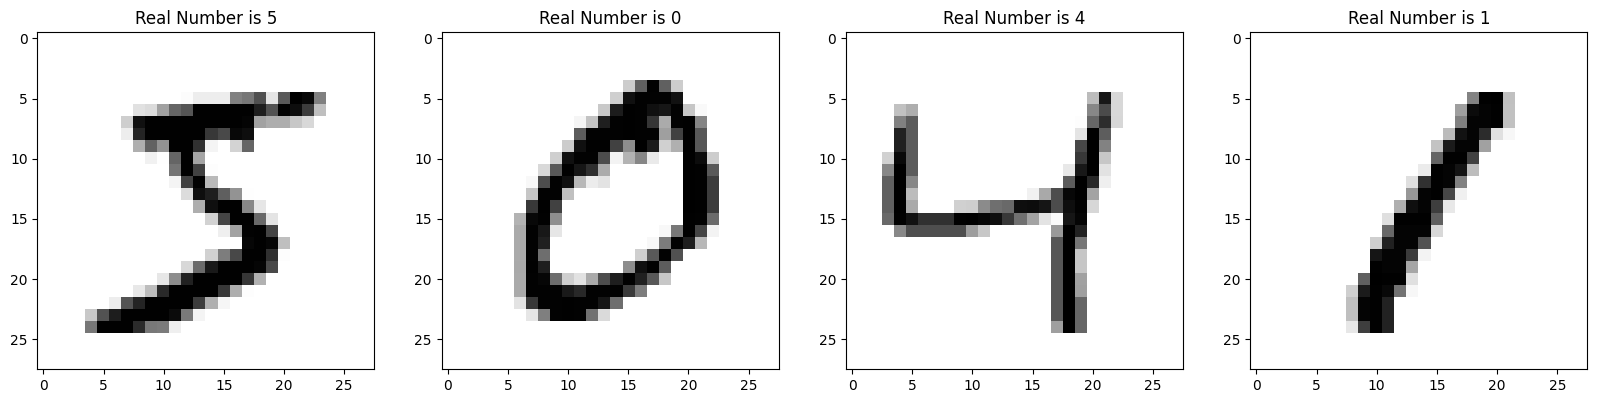

In [ ]:
x_train__ = x_train.reshape(x_train.shape[0], 28, 28)

fig, axis = plt.subplots(1, 4, figsize=(20, 10))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_train__[i], cmap='binary')
    digit = y_train[i].argmax()
    ax.set(title = f"Real Number is {digit}");

## Building the Model

#### Define the model
I used the Keras Sequential API, where you have just to add one layer at a time, starting from the input.

The first is the convolutional (Conv2D) layer. It is like a set of learnable filters. I choosed to set 32 filters for the two firsts conv2D layers and 64 filters for the two second layers and 128 filters for two third layers and 256 for the last ones. Each filter transforms a part of the image (defined by the kernel size) using the kernel filter. The kernel filter matrix is applied on the whole image. Filters can be seen as a transformation of the image.

The CNN can isolate features that are useful everywhere from these transformed images (feature maps).

The second important layer in CNN is the pooling (MaxPool2D) layer. This layer simply acts as a downsampling filter. It looks at the 2 neighboring pixels and picks the maximal value. These are used to reduce computational cost, and to some extent also reduce overfitting. We have to choose the pooling size (i.e the area size pooled each time) more the pooling dimension is high, more the downsampling is important.

Combining convolutional and pooling layers, CNN are able to combine local features and learn more global features of the image.

'relu' is the rectifier (activation function max(0,x). The rectifier activation function is used to add non linearity to the network.

The Flatten layer is use to convert the final feature maps into a one single 1D vector. This flattening step is needed so that you can make use of fully connected layers after some convolutional/maxpool layers. It combines all the found local features of the previous convolutional layers.

In the end i used the features in two fully-connected (Dense) layers which is just artificial an neural networks (ANN) classifier. In the last layer(Dense(10,activation="softmax")) the net outputs distribution of probability of each class.

Model Definition

In [ ]:
model=Sequential()    #flatten will convert 2D(28*28) to 1D(784) , give it as i/p to ANN

#model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(filters=256, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()   #784*128+128(bias) = 100480  #128*10+10(bias) = 1290

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 12, 12, 64)        256       
 Normalization)                                                  
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

### Data augmentation
In order to avoid overfitting problem, we need to expand artificially our handwritten digit dataset. We can make your existing dataset even larger. The idea is to alter the training data with small transformations to reproduce the variations occuring when someone is writing a digit.

For example, the number is not centered The scale is not the same (some who write with big/small numbers) The image is rotated...

Approaches that alter the training data in ways that change the array representation while keeping the label the same are known as data augmentation techniques. Some popular augmentations people use are grayscales, horizontal flips, vertical flips, random crops, color jitters, translations, rotations, and much more.

By applying just a couple of these transformations to our training data, we can easily double or triple the number of training examples and create a very robust model.

In [ ]:
# With data augmentation to prevent overfitting

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.01, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


#datagen.fit(x_train)
train_gen = datagen.flow(x_train, y_train, batch_size=128)
test_gen = datagen.flow(x_test, y_test, batch_size=128)

For the data augmentation, i choosed to :

* Randomly rotate some training images by 10 degrees
* Randomly Zoom by 10% some training images
* Randomly shift images horizontally by 10% of the width
* Randomly shift images vertically by 10% of the height

I did not apply a vertical_flip nor horizontal_flip since it could have lead to misclassify symetrical numbers such as 6 and 9.

Once our model is ready, we fit the training dataset .

Model training

In [ ]:
# This make accuarcy 0.99
model_history=model.fit(x_train, y_train, batch_size=128, validation_split=0.2, epochs=10)

Epoch 1/10
375/375 [==============================] - 18s 14ms/step - loss: 0.0926 - accuracy: 0.9718 - val_loss: 2.2561 - val_accuracy: 0.2495
Epoch 2/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.0511 - val_accuracy: 0.9863
Epoch 3/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0258 - accuracy: 0.9917 - val_loss: 0.0471 - val_accuracy: 0.9879
Epoch 4/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0198 - accuracy: 0.9939 - val_loss: 0.0458 - val_accuracy: 0.9883
Epoch 5/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0135 - accuracy: 0.9955 - val_loss: 0.0416 - val_accuracy: 0.9909
Epoch 6/10
375/375 [==============================] - 5s 13ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.1423 - val_accuracy: 0.9702
Epoch 7/10
375/375 [==============================] - 5s 14ms/step - loss: 0.0140 - accuracy: 0.9955 - val_loss: 0.0680 - val_accuracy: 0.981

### Drive training phase
EarlyStoping: Stop training when a monitored metric has stopped improving.

ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.

In [ ]:
epochs = 45
batch_size = 128
train_steps = len(x_train) // batch_size
valid_steps = len(x_test) // batch_size

es = keras.callbacks.EarlyStopping(
        monitor="val_accuracy", # metrics to monitor
        patience=5, # how many epochs before stop
        verbose=1,
        mode="max", # we need the maximum accuracy.
        restore_best_weights=True,
     )

rp = keras.callbacks.ReduceLROnPlateau(
        monitor="val_accuracy",
        factor=0.2,
        patience=3,
        verbose=1,
        mode="max",
        min_lr=0.00001
     )

In [ ]:
# Fit the model
history = model.fit_generator(train_gen,
                              epochs = epochs,
                              steps_per_epoch = train_steps,
                              validation_data = test_gen,
                              validation_steps = valid_steps,
                              callbacks=[es, rp])

Epoch 1/45
468/468 [==============================] - 29s 60ms/step - loss: 0.0668 - accuracy: 0.9814 - val_loss: 0.0375 - val_accuracy: 0.9884 - lr: 0.0010
Epoch 2/45
468/468 [==============================] - 24s 52ms/step - loss: 0.0331 - accuracy: 0.9902 - val_loss: 0.0264 - val_accuracy: 0.9921 - lr: 0.0010
Epoch 3/45
468/468 [==============================] - 31s 67ms/step - loss: 0.0283 - accuracy: 0.9914 - val_loss: 0.0355 - val_accuracy: 0.9899 - lr: 0.0010
Epoch 4/45
468/468 [==============================] - 28s 60ms/step - loss: 0.0259 - accuracy: 0.9919 - val_loss: 0.0543 - val_accuracy: 0.9846 - lr: 0.0010
Epoch 5/45
468/468 [==============================] - ETA: 0s - loss: 0.0246 - accuracy: 0.9922
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
468/468 [==============================] - 28s 59ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0450 - val_accuracy: 0.9877 - lr: 0.0010
Epoch 6/45
468/468 [==============================] -

Plot CNN model

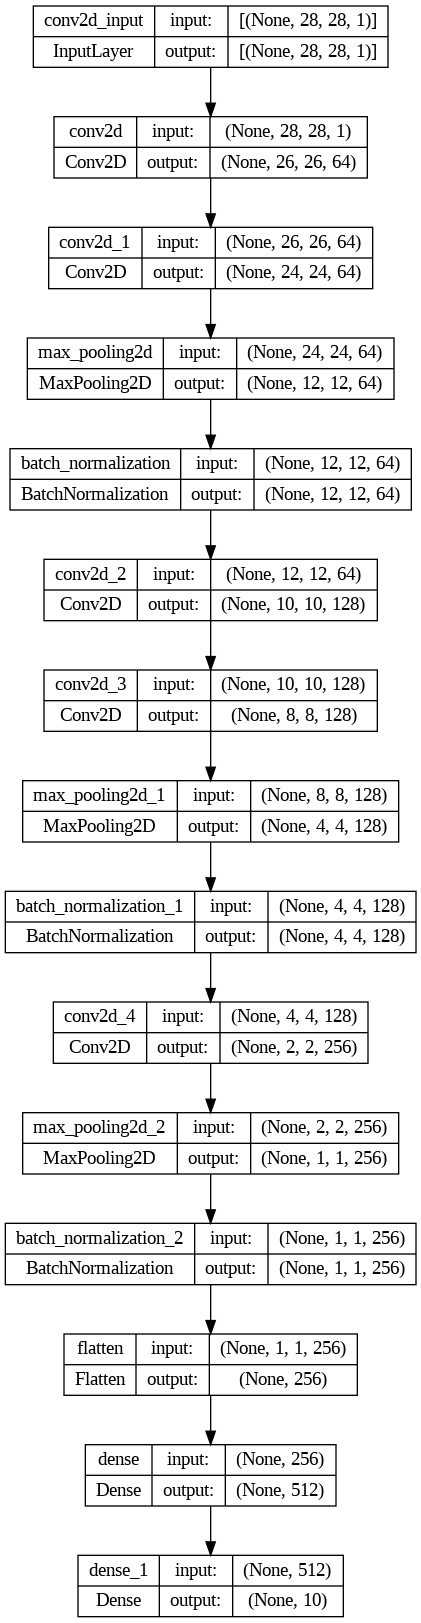

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='CNN_model_arch.png', show_shapes=True, show_layer_names=True)

#  Evaluate the model
 ### Training and validation curves

### Plot the loss and accuracy curves for training and validation without data Agumentation

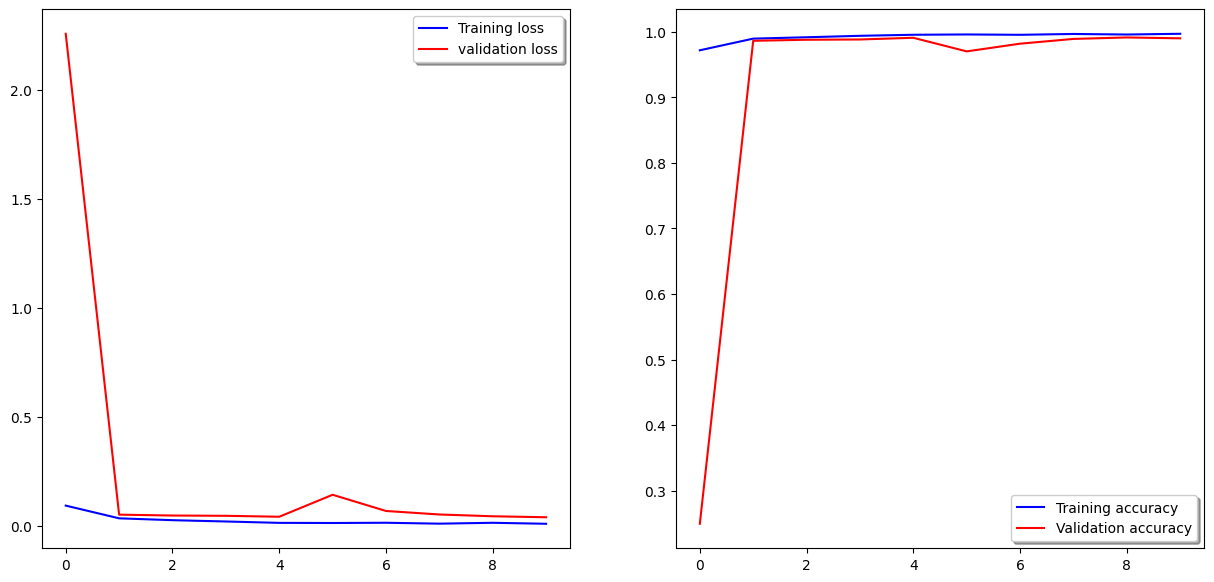

In [ ]:

fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].plot(model_history.history['loss'], color='b', label="Training loss")
ax[0].plot(model_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(model_history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(model_history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

* The training accuracy started at 0.9718 and reached 0.970 at the final epoch, while the validation accuracy started at 0.2495 and reached 0.9901.
* The training loss started at 0.0926 and decreased gradually to 0.0093 at the final epoch, while the validation loss started at 2.2561 and decreased to 0.0392.

## Plot the loss and accuracy curves for training and validation with data Agumentation

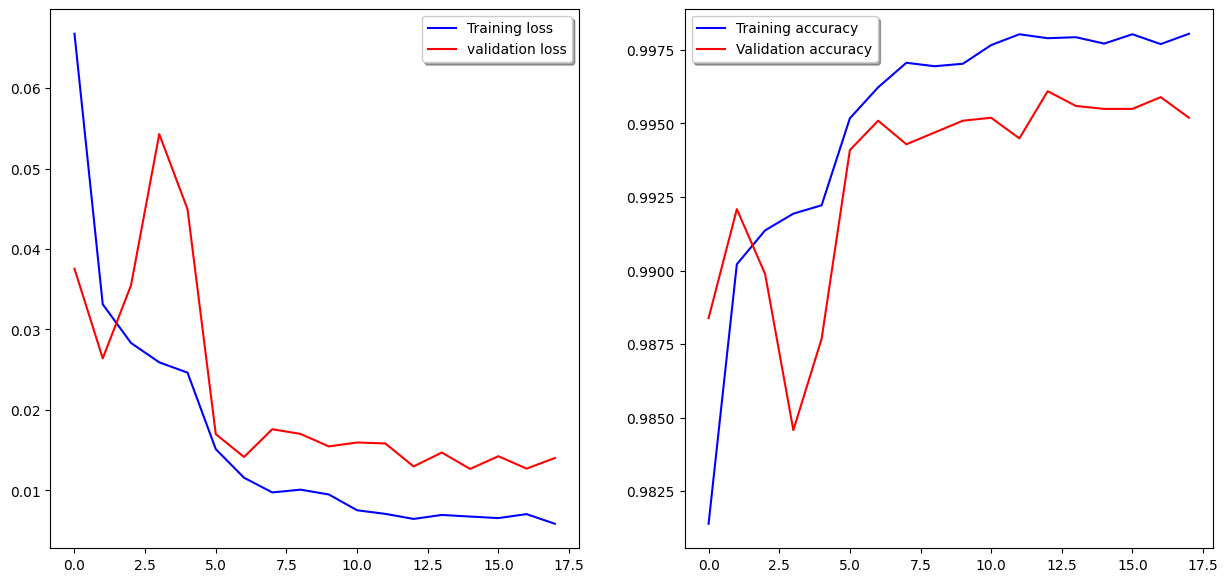

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

* The training accuracy started at 0.9814 and reached 0.9980  at the final epoch, while the validation accuracy started at 0.9884 and reached 0.9952.
* The training loss started at 0.0668 and decreased gradually to 0.0.0058 at the final epoch, while the validation loss started at  0.0375 and decreased to  0.0140.
*The loss on the validation set decreased gradually throughout the epochs, while the training loss decreased steeply in the first few epochs and then slowed down.

## Confusion matrix
Confusion matrix can be very helpfull to see your model drawbacks.

I plot the confusion matrix of the validation results.

313/313 [==============================] - 1s 2ms/step


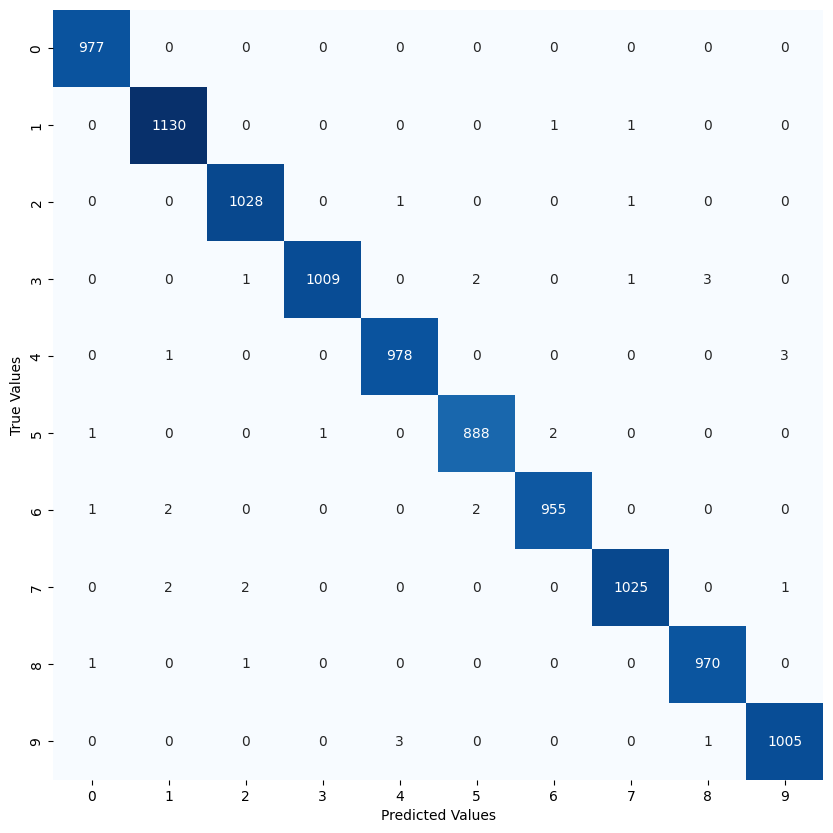

In [ ]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model.predict(x_test) # Predict class probabilities as 2 => [0.1, 0, 0.9, 0, 0, 0, 0, 0, 0, 0]

Y_pred = np.argmax(y_pred, 1) # Decode Predicted labels
Y_test = np.argmax(y_test, 1) # Decode labels

mat = confusion_matrix(Y_test, Y_pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='.0f')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();

With Data Agumentation we have achieved 99% accuracy for both training and testing data which means data balancing is also done

## K-Nearest Neighbors
Determining Optimal Number of Neighbors  
 To detect optimal value for 'K', lets compare the accuracy of KNN models with different 'K' values.

By plotting the values in a graph, we can see the performance visually, and select the best performing 'K' value

In [ ]:
# Training Dataset
train_size = 60000
test_size = 10000
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train[:(train_size//10)], y_train[:(train_size//10)], test_size=0.25, random_state=28)
print(X_train.shape, X_valid.shape, Y_train.shape, Y_valid.shape)

(4500, 28, 28, 1) (1500, 28, 28, 1) (4500, 10) (1500, 10)


In [ ]:
score = []

for k in range(1, 9):
  print('Begin KNN with k=',k)
  classifier = KNeighborsClassifier(n_neighbors=k)
  classifier = classifier.fit(X_train.reshape(X_train.shape[0], 28*28), Y_train)
  pred = classifier.predict(X_valid.reshape(X_valid.shape[0], 28*28))
  accuracy = accuracy_score(Y_valid, pred)
  score.append(accuracy)
  print("Accuracy: ",accuracy)
  print("Confusion Matrix:\n", confusion_matrix(Y_valid.argmax(axis=1), pred.argmax(axis=1)))
  print("\n---------------\n")

Begin KNN with k= 1
Accuracy:  0.9506666666666667
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  0 156   0   1   0   0   0   0   0   0]
 [  0   3 127   0   0   0   0   2   2   0]
 [  2   1   1 151   0   3   1   0   1   1]
 [  0   4   0   0 157   0   2   0   0   6]
 [  1   0   0   0   2 128   1   0   0   2]
 [  1   0   0   0   0   0 157   0   1   0]
 [  0   4   0   1   1   2   0 166   0   3]
 [  0   1   3   4   0   2   0   1 110   0]
 [  4   0   1   1   5   0   0   3   0 131]]

---------------

Begin KNN with k= 2
Accuracy:  0.898
Confusion Matrix:
 [[143   0   0   0   0   0   0   0   0   0]
 [  1 156   0   0   0   0   0   0   0   0]
 [ 13   2 118   0   0   0   0   1   0   0]
 [ 14   0   0 145   0   2   0   0   0   0]
 [ 17   2   0   0 146   0   1   0   0   3]
 [ 14   0   0   0   1 118   1   0   0   0]
 [  5   0   0   0   0   0 154   0   0   0]
 [ 23   1   0   0   0   0   0 152   0   1]
 [ 19   1   0   2   0   1   0   0  98   0]
 [ 21   0   0   1   1   0   0   2   0 1

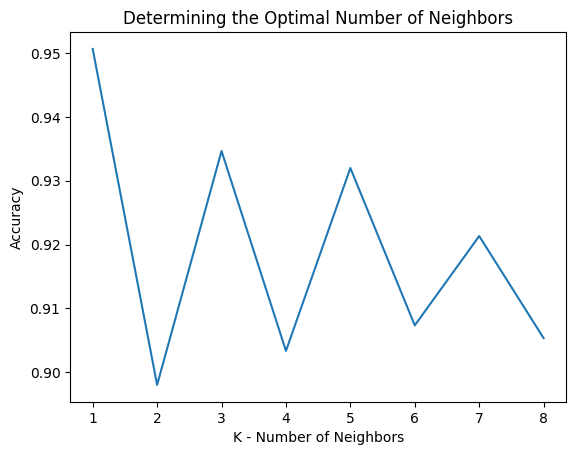

In [ ]:
plt.plot(range(1,9), score)
plt.title('Determining the Optimal Number of Neighbors')
plt.xlabel('K - Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

Values of K, and performance

* K = 1, accuracy = 95.0
* K = 2, accuracy = 89.8
* K = 3, accuracy = 93.4
* K = 4, accuracy = 90.3
* K = 5, accuracy = 93.2
* K = 6, accuracy = 90.7
* K = 7, accuracy = 92.1
* K = 8, accuracy = 90.5

Looking at the performance scores, K=1 might seem the most promising model as it has the highest accuracy.

But pragmatically, trying to predict a datapoint based on only one neighbor is definitely not a better choice to make. So, it's a wise choice to ignore the option.

There is a huge dip in performance for K=2.

The performance curve increases for K=4, and increases again for k=5.

It's upto us to choose either 3 or 5 for our requirement.

### Training the model

In [ ]:
%%time
print('Training the Model')
classifier = KNeighborsClassifier(n_neighbors=5)
classifier = classifier.fit(x_train.reshape(x_train.shape[0], 28*28), y_train)

Training the Model
CPU times: user 94.4 ms, sys: 917 µs, total: 95.3 ms
Wall time: 308 ms


### Testing the Model

In [ ]:
%%time
y_pred = classifier.predict(x_test.reshape(x_test.shape[0], 28*28))

CPU times: user 39.9 s, sys: 111 ms, total: 40 s
Wall time: 30.5 s


In [ ]:
print(confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
print(accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

[[ 974    1    1    0    0    1    2    1    0    0]
 [   2 1131    2    0    0    0    0    0    0    0]
 [  18    7  987    2    0    0    1   14    3    0]
 [   9    2    2  971    1   12    1    6    3    3]
 [   8    6    0    0  942    0    4    1    0   21]
 [  18    0    0    7    2  854    4    1    2    4]
 [   6    3    0    0    3    1  945    0    0    0]
 [   5   20    4    0    2    0    0  986    0   11]
 [  26    1    3   11    4    8    4    4  909    4]
 [  16    4    2    5    7    1    1    9    2  962]]
0.9661


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1001
           1       1.00      0.96      0.98      1175
           2       0.96      0.99      0.97      1001
           3       0.96      0.97      0.97       996
           4       0.96      0.98      0.97       961
           5       0.96      0.97      0.97       877
           6       0.99      0.98      0.98       962
           7       0.96      0.96      0.96      1022
           8       0.93      0.99      0.96       919
           9       0.95      0.96      0.96      1005

   micro avg       0.97      0.97      0.97      9919
   macro avg       0.97      0.97      0.97      9919
weighted avg       0.97      0.97      0.97      9919
 samples avg       0.97      0.97      0.97      9919



## Results
KNN Model with  neighbors 5 performed really well with 96.61% accuracy.

## SVM
sklearn(scikit learn) is a Machine Learning library that contains most of the popular Machine Learning Models implementations.

Creating and training a SVM Classifier.

In [ ]:
classifier = SVC()

In [ ]:
#classifier.fit(x_train, y_train)
classifier.fit(x_train.reshape(x_train.shape[0], 28*28), y_train)

SVC()

In [ ]:
#classifier.score(x_test, y_test)
classifier.score(x_test.reshape(x_test.shape[0], 28*28), y_test)

0.9792

In [ ]:
y_pred = classifier.predict(x_test.reshape(x_test.shape[0],28*28))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.97      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 973,    0,    1,    0,    0,    2,    1,    1,    2,    0],
       [   0, 1126,    3,    1,    0,    1,    1,    1,    2,    0],
       [   6,    1, 1006,    2,    1,    0,    2,    7,    6,    1],
       [   0,    0,    2,  995,    0,    2,    0,    5,    5,    1],
       [   0,    0,    5,    0,  961,    0,    3,    0,    2,   11],
       [   2,    0,    0,    9,    0,  871,    4,    1,    4,    1],
       [   6,    2,    0,    0,    2,    3,  944,    0,    1,    0],
       [   0,    6,   11,    1,    1,    0,    0,  996,    2,   11],
       [   3,    0,    2,    6,    3,    2,    2,    3,  950,    3],
       [   3,    4,    1,    7,   10,    2,    1,    7,    4,  970]])

Accuracy of the classifier is 97.92%

## Model Comparison Report

Model generally perform better when trained on augmented data as compared to normal data
* The CNN model have higher validation accuracy on augmented data than on normal data.
* The CNN model has the lowest loss, lowest validation loss.
* CNN is the best performing model whereas KNN is least performing model on this dataset.
* Based on the provided data, it appears that the CNN model trained on augmented data has the highest validation accuracy among the three models evaluated, with a accuracy of 99%. Whereas KNN,SVM having accuracy of 96% and 97%.




## Report on Challenges faced

Using CNN model, with data agumentation it takes lots of time to get trained.